In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from surprise import Reader, Dataset

In [2]:
rating_data = pd.read_csv('ratings.csv') 
movie_data = pd.read_csv('movies.csv')

In [3]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print(movie_data.shape)
print(rating_data.shape)

(9125, 3)
(100004, 4)


In [6]:
rating_data.drop('rating', axis = 1, inplace = True)
rating_data.head()

,userId,movieId,timestamp
0,1,31,1260759144
1,1,1029,1260759179
2,1,1061,1260759182
3,1,1129,1260759185
4,1,1172,1260759205


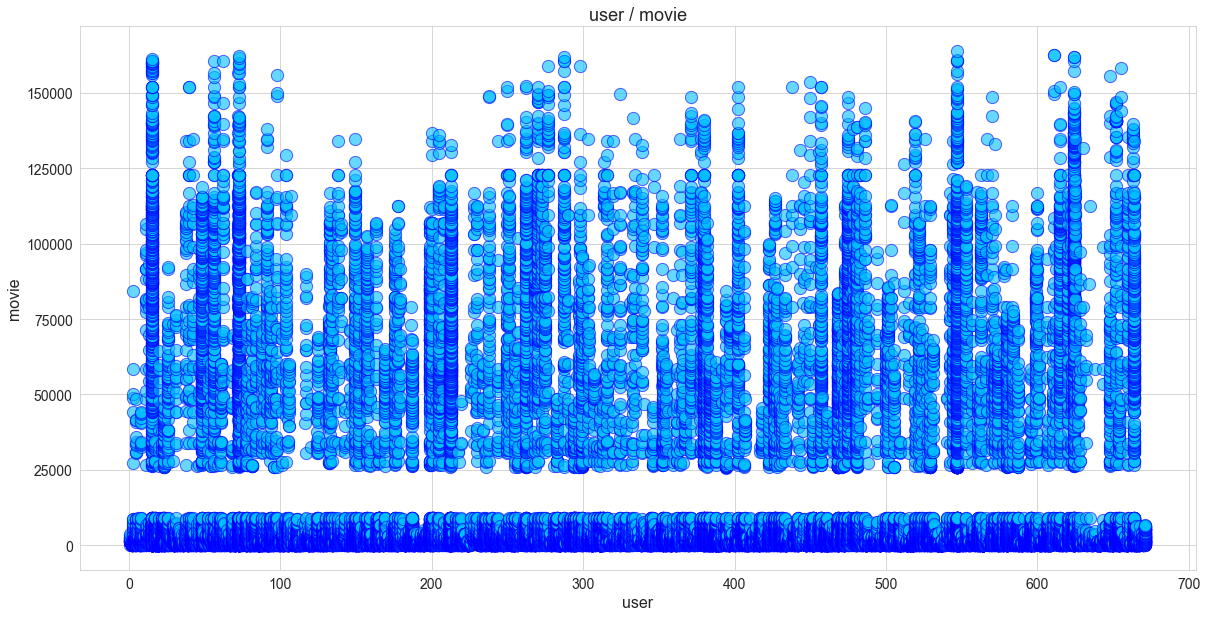

In [31]:
import seaborn as sb
sb.set_style('whitegrid')
sb.scatterplot('userId', 'movieId', 
               data = rating_data, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('user / movie', 
          fontsize = 18)
plt.xlabel('user', 
           fontsize = 16)
plt.ylabel('movie', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

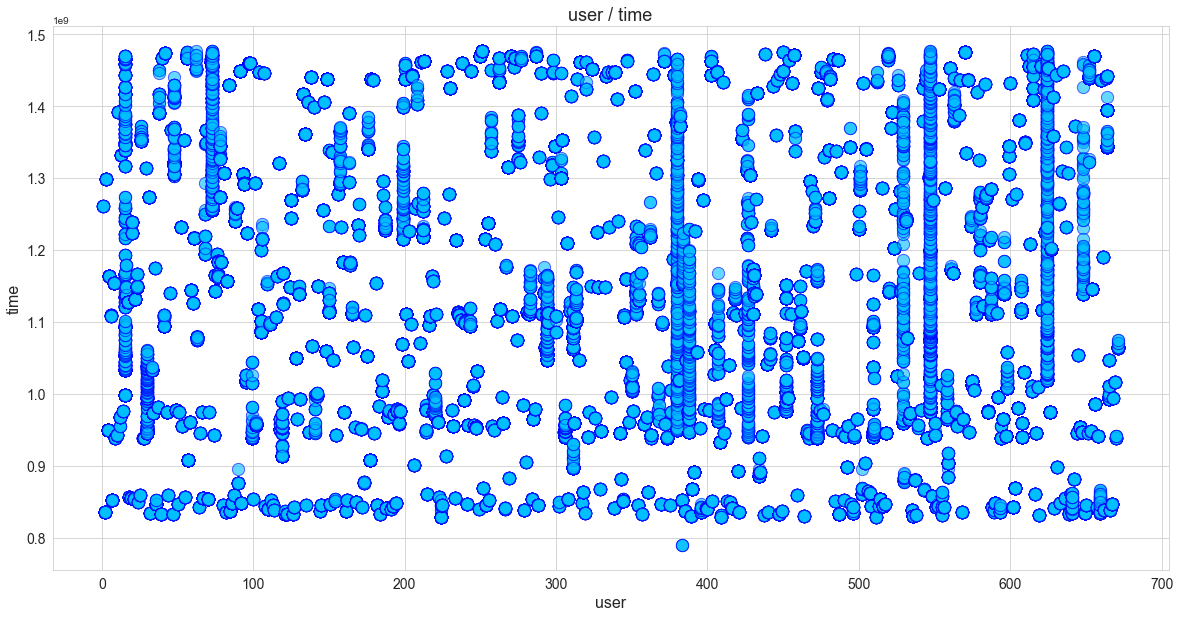

In [32]:
sb.set_style('whitegrid')
sb.scatterplot('userId', 'timestamp', 
               data = rating_data, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('user / time', 
          fontsize = 18)
plt.xlabel('user', 
           fontsize = 16)
plt.ylabel('time', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_income.png')
plt.show()

In [7]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sb 
from mpl_toolkits.mplot3d import Axes3D 
from termcolor import colored as cl

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

In [9]:
# DATA PROCESSING

X = rating_data.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[-1.77293623 -0.47471017  0.68403969]
 [-1.77293623 -0.43686279  0.68403987]
 [-1.77293623 -0.43564925  0.68403989]
 [-1.77293623 -0.43307047  0.6840399 ]
 [-1.77293623 -0.43143977  0.68404001]]


In [26]:
# MODELING

clusters = 6
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(rating_data.values)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5]


In [27]:
rating_data['cluster_num'] = labels
rating_data.head()

,userId,movieId,timestamp,cluster_num
0,1,31,1260759144,2
1,1,1029,1260759179,2
2,1,1061,1260759182,2
3,1,1129,1260759185,2
4,1,1172,1260759205,2


In [28]:
rating_data.groupby('cluster_num').mean()

,userId,movieId,timestamp
cluster_num,,,
0,376.971430,2073.775664,9.726919e+08
1,346.896770,41058.279103,1.444332e+09
2,324.635690,16150.579487,1.229853e+09
3,329.901505,591.913476,8.565753e+08
4,334.662129,4875.884885,1.111754e+09
5,334.776684,25753.360550,1.326806e+09


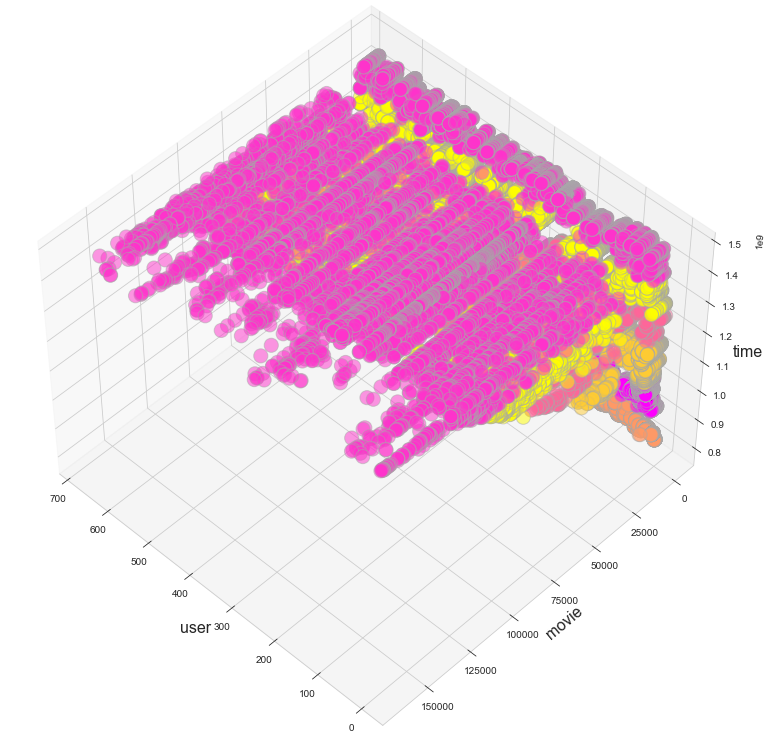

In [30]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(rating_data['userId'], rating_data['movieId'], rating_data['timestamp'], 
           c = rating_data['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('user', 
              fontsize = 16)
ax.set_ylabel('movie', 
              fontsize = 16)
ax.set_zlabel('time', 
              fontsize = 16)

#plt.savefig('3d_plot.png')
plt.show()